In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

df = pd.read_csv(r"C:\crypto-volatility-prediction\data\raw\dataset.csv")

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

df.head()


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [4]:
df['log_return'] = np.log(df['close'] / df['close'].shift(1))
df['rolling_volatility_14'] = df['log_return'].rolling(14).std()


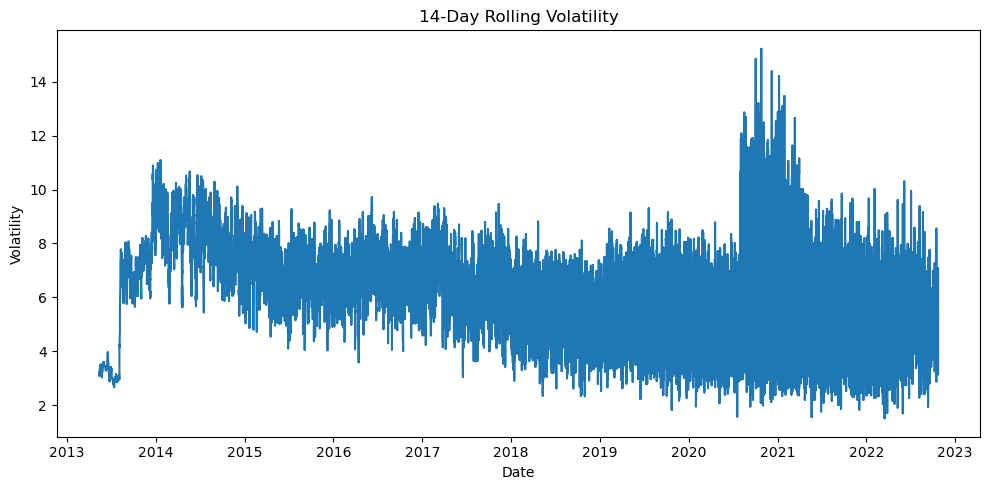

In [5]:
os.makedirs("images", exist_ok=True)

plt.figure(figsize=(10,5))
plt.plot(df['date'], df['rolling_volatility_14'])
plt.title("14-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.tight_layout()
plt.savefig("images/rolling_volatility.png")
plt.show()
